In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score , mean_squared_error,r2_score

In [2]:
df = pd.read_csv(r"C:\Users\mitra\Downloads\Processed_Flipdata - Processed_Flipdata.csv")
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,541.0,289.711645,182.359185,0.0,135.00,273.00,434.00,642.00
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94


In [5]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [6]:
df.rename(columns={'Prize':'Price'},inplace=True)

In [7]:
df.drop('Unnamed: 0', axis=1 , inplace=True)

In [8]:
df.isna().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

In [9]:
le=LabelEncoder()

df['Colour'] = le.fit_transform(df['Colour'])
df['Model'] = le.fit_transform(df['Model'])

In [10]:
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,23,159,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,23,20,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,37,149,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,69,201,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,12,130,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [11]:
df.rename(columns={'Rear Camera':'Rear Camera (MP)'},inplace=True)
df.rename(columns={'Front Camera':'Front Camera (MP)'},inplace=True)


df['Rear Camera (MP)'] = df['Rear Camera (MP)'].astype(str).str.replace('MP','',regex=False)
df['Front Camera (MP)'] = df['Front Camera (MP)'].astype(str).str.replace('MP','',regex=False)


df['Rear Camera (MP)'] = pd.to_numeric(df['Rear Camera (MP)'], errors='coerce').fillna(0).astype(int)
df['Front Camera (MP)'] = pd.to_numeric(df['Front Camera (MP)'], errors='coerce').fillna(0).astype(int)

In [12]:
df['Price']=pd.to_numeric (df['Price'].astype(str).str.replace(',','',regex=False), errors= 'coerce')

<Axes: >

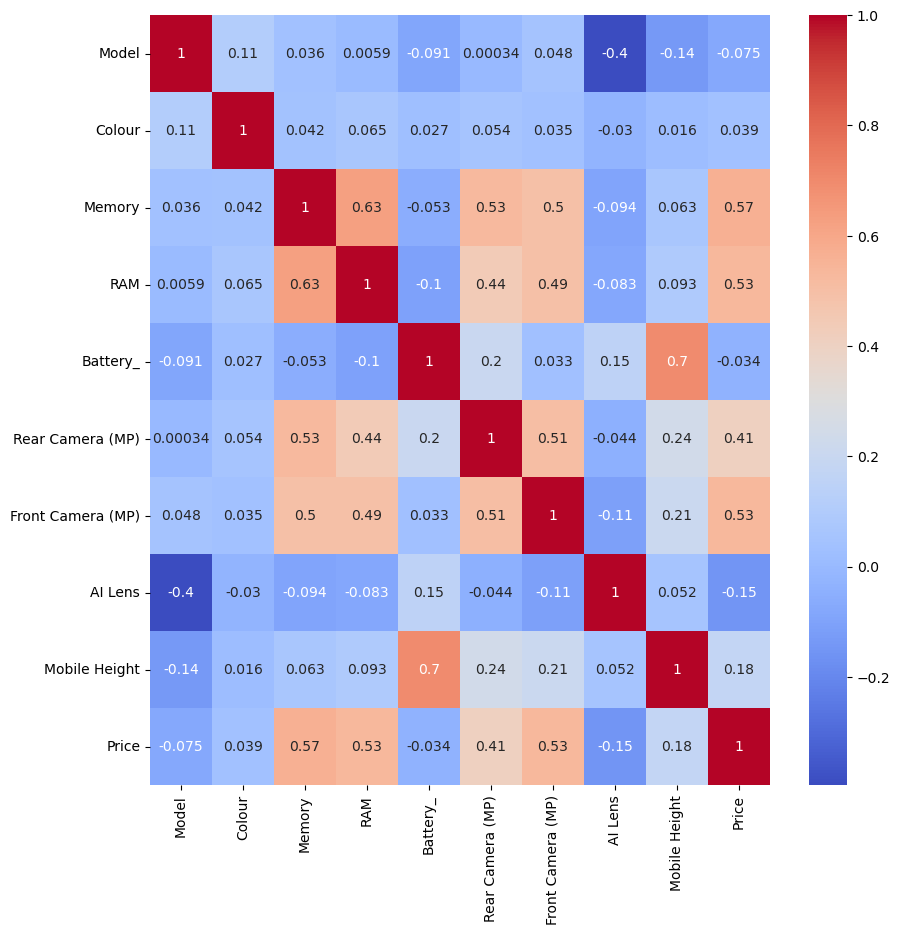

In [13]:
cols=df[['Model','Colour','Memory','RAM','Battery_','Rear Camera (MP)','Front Camera (MP)','AI Lens','Mobile Height','Price']]
plt.figure(figsize=(10,10))
sns.heatmap(cols.corr(),annot=True, cmap='coolwarm')

In [14]:
X=df[['Memory','RAM','Rear Camera (MP)','Front Camera (MP)']]
y=df['Price']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mae= mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results are----")
print(f'MAE = {mae:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'R2 = {r2:.2f}')

Linear Regression Results are----
MAE = 3986.85
RMSE = 82824660.66
R2 = 0.40


In [15]:
from sklearn.model_selection import cross_val_score

isscore = cross_val_score(lr,X,y,cv=25)
lsc = isscore.mean()
lss = r2_score(y_test, y_pred)

print('Cross Validation Score : ',lsc*100)
print('Accuracy Score : ' , lss*100)

Cross Validation Score :  27.050110557153516
Accuracy Score :  39.90714192066219


In [16]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


             Feature  Coefficient
1                RAM  1266.317161
3  Front Camera (MP)   327.227525
0             Memory    46.059070
2   Rear Camera (MP)    12.581089


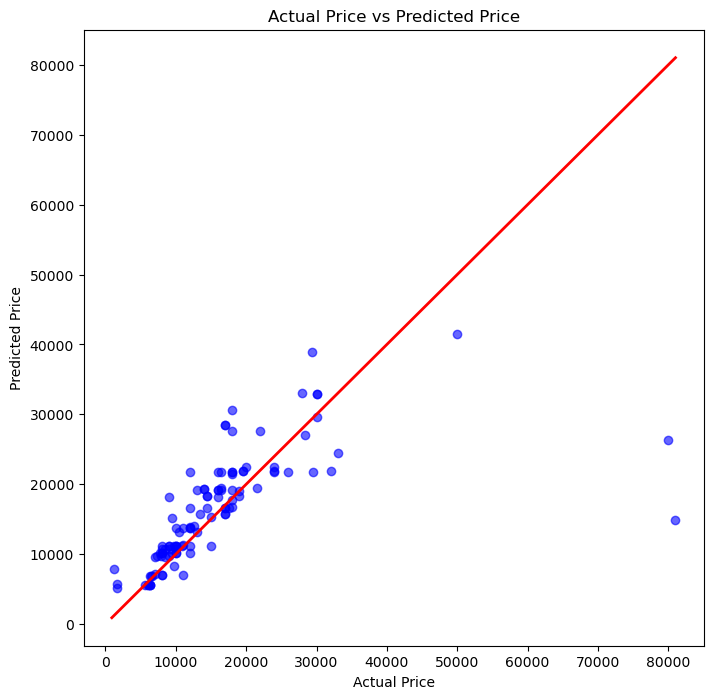

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red',lw=2)
plt.show()

In [18]:

rf = RandomForestRegressor(random_state=42 , n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_pred,y_test)
rmse = mean_squared_error(y_pred , y_test)
r2 = r2_score(y_pred, y_test)

print('Random Forest Results are ---')
print(f'MAE = {mae:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'R-SQUARED = {r2:.2f}')

Random Forest Results are ---
MAE = 2851.19
RMSE = 30044368.84
R-SQUARED = 0.72


In [19]:
isscore = cross_val_score(rf,X,y,cv=25)
lsc = isscore.mean()
lss = r2_score(y_test, y_pred)

print('Cross Validation Score is : ' , lsc*100)
print('Accuracy Score is : ' , lss*100)

Cross Validation Score is :  7.776103376819096
Accuracy Score is :  78.20151656796146


In [22]:
gb= GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
pred = gb.predict(X_test)

mae = mean_absolute_error(pred,y_test)
rmse = mean_squared_error(pred , y_test)
r2 = r2_score(pred, y_test)

print('Gradient Boosting Results are ---')
print(f'MAE = {mae:.2f}')
print(f'RMSE = {rmse:.2f}')
print(f'R-SQUARED = {r2:.2f}')

Gradient Boosting Results are ---
MAE = 2941.65
RMSE = 29840414.87
R-SQUARED = 0.71


In [23]:
isscore = cross_val_score(gb , X,y,cv=24)
lsc= isscore.mean()
lss = r2_score(y_test, pred)

print('Cross Validation Score is : ' , lsc*100)
print('Accuracy Score is : ', lss*100)

Cross Validation Score is :  29.57568321734107
Accuracy Score is :  78.34949395814144
